In [2]:
pip install keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 806.8 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 1.3 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 900.6 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 1.0 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.3/308.3 kB 1.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.7/240.7 kB 866.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 427.4 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.9/589.9 MB 1.2 MB/s eta 0:00:0000:0100:13m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 1.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 1.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 1.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 1.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 1.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.3/87.3 kB 489.1 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 558.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 1.0 MB/s eta 0:00:0000:010m00:01
  Attempting uninstall: ml-dtypes
    Foun

In [211]:
#Prepare and process data
import math
import pandas as pd #read data file csv
import matplotlib.pyplot as plt #draw chart
import matplotlib.ticker as ticker #Format
import numpy as np #data processing
from keras.callbacks import ModelCheckpoint #keep good training
from tensorflow.keras.models import load_model #download model
from sklearn.preprocessing import MinMaxScaler #normalize data 0->1
#Training, model building
from keras.models import Sequential #input
from keras.layers import Dropout #avoid overfitting
from keras.layers import LSTM #dependent learning
from keras.layers import Dense #output
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
# from keras import regularizers


#Phân tích chỉ số
from sklearn.metrics import r2_score #measure suitability
from sklearn.metrics import mean_squared_error #measure MSE and RMSE = sqrt(MSE)
from sklearn. metrics import mean_absolute_error #measure mean absolute error
from sklearn.metrics import mean_absolute_percentage_error #measure the mean percent absolute error

In [212]:
df=pd.read_csv('../assets/weather_hours_encoded.csv')
df

,datetime,temp,feelslike,dew,humidity,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,conditions_encoded
0,2022-05-01T00:00:00,26.0,26.0,26.0,100.00,22.0,3.6,128.6,1007.0,50.0,10.0,0,0.0,0,Partially cloudy,2
1,2022-05-01T01:00:00,26.1,26.1,26.0,99.34,15.5,1.4,128.6,1007.0,52.8,10.9,0,0.0,0,Partially cloudy,2
2,2022-05-01T02:00:00,26.0,26.0,26.0,100.00,7.9,3.6,350.0,1006.0,50.0,7.0,0,0.0,0,Partially cloudy,2
3,2022-05-01T03:00:00,26.0,26.0,26.0,100.00,9.7,1.8,310.0,1006.0,50.0,7.0,0,0.0,0,Partially cloudy,2
4,2022-05-01T04:00:00,26.0,26.0,25.1,94.39,11.2,1.4,30.0,1005.1,53.7,8.2,0,0.0,0,Partially cloudy,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18187,2024-05-27T19:00:00,29.0,38.0,28.0,94.35,16.9,18.4,180.0,1006.0,50.0,10.0,0,0.0,0,Partially cloudy,2
18188,2024-05-27T20:00:00,29.0,36.7,27.0,88.99,17.3,5.4,220.0,1007.0,50.0,10.0,0,0.0,0,Partially cloudy,2
18189,2024-05-27T21:00:00,29.0,36.7,27.0,88.99,23.8,14.8,210.0,1007.0,50.0,10.0,0,0.0,0,"Rain, Partially cloudy",5
18190,2024-05-27T22:00:00,29.0,36.7,27.0,88.99,26.3,11.2,210.0,1008.0,50.0,10.0,0,0.0,0,"Rain, Partially cloudy",5


In [213]:
df.drop(["conditions"], axis=1, inplace=True)

In [214]:
df

,datetime,temp,feelslike,dew,humidity,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions_encoded
0,2022-05-01T00:00:00,26.0,26.0,26.0,100.00,22.0,3.6,128.6,1007.0,50.0,10.0,0,0.0,0,2
1,2022-05-01T01:00:00,26.1,26.1,26.0,99.34,15.5,1.4,128.6,1007.0,52.8,10.9,0,0.0,0,2
2,2022-05-01T02:00:00,26.0,26.0,26.0,100.00,7.9,3.6,350.0,1006.0,50.0,7.0,0,0.0,0,2
3,2022-05-01T03:00:00,26.0,26.0,26.0,100.00,9.7,1.8,310.0,1006.0,50.0,7.0,0,0.0,0,2
4,2022-05-01T04:00:00,26.0,26.0,25.1,94.39,11.2,1.4,30.0,1005.1,53.7,8.2,0,0.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18187,2024-05-27T19:00:00,29.0,38.0,28.0,94.35,16.9,18.4,180.0,1006.0,50.0,10.0,0,0.0,0,2
18188,2024-05-27T20:00:00,29.0,36.7,27.0,88.99,17.3,5.4,220.0,1007.0,50.0,10.0,0,0.0,0,2
18189,2024-05-27T21:00:00,29.0,36.7,27.0,88.99,23.8,14.8,210.0,1007.0,50.0,10.0,0,0.0,0,5
18190,2024-05-27T22:00:00,29.0,36.7,27.0,88.99,26.3,11.2,210.0,1008.0,50.0,10.0,0,0.0,0,5


In [215]:
df.info() # kiểm tra dữ liệu đã được định dạng

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18192 entries, 0 to 18191
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            18192 non-null  object 
 1   temp                18192 non-null  float64
 2   feelslike           18192 non-null  float64
 3   dew                 18192 non-null  float64
 4   humidity            18192 non-null  float64
 5   windgust            18192 non-null  float64
 6   windspeed           18192 non-null  float64
 7   winddir             18192 non-null  float64
 8   sealevelpressure    18192 non-null  float64
 9   cloudcover          18192 non-null  float64
 10  visibility          18192 non-null  float64
 11  solarradiation      18192 non-null  int64  
 12  solarenergy         18192 non-null  float64
 13  uvindex             18192 non-null  int64  
 14  conditions_encoded  18192 non-null  int64  
dtypes: float64(11), int64(3), object(1)
memory usage: 2.1

In [216]:
# correlation = df['price_coffee'].corr(df['price_oil'])

# print(" Correlation coefficient: ", correlation)

In [217]:
#Định dạng lại cấu trúc của cột Date (định dạng năm-tháng-ngày)
df["datetime"] = pd.to_datetime(df.datetime, format="%Y-%m-%dT%H:%M:%S")

In [218]:
df=pd.DataFrame(df,columns=['datetime','temp','feelslike','dew','humidity','windgust','windspeed','winddir','sealevelpressure','cloudcover','visibility','solarradiation','solarenergy','uvindex','conditions_encoded'])
df.index=df.datetime
df.drop("datetime",axis=1, inplace=True)

<Axes: xlabel='datetime'>

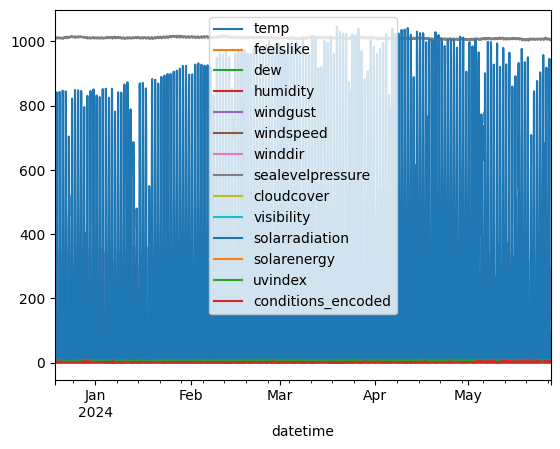

In [219]:
df_for_plot=df.tail(3865)
df_for_plot.plot.line()# df_for_plot=df_for_training.tail(5000)

## **Devided Data**

In [220]:
df.shape #kiểm tra số dòng của dữ liệu

(18192, 14)

In [221]:
data=df.values
training_data_len = math.ceil(len(data)* 0.8)
train_data = data[0: training_data_len, :]
train_data.shape
test_data=data[training_data_len:]
test_data.shape

(3638, 14)

In [222]:
#Tiến hành chuẩn hoá lại dữ liệu với các giá trị được đưa về từ 0-1
sc=MinMaxScaler(feature_range=(0,1))
#Chuẩn hoá dữ liệu có tên data
sc_train=sc.fit_transform(data)

In [223]:
sc

MinMaxScaler()

In [224]:
sc_train.shape

(18192, 14)

In [225]:

trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.


In [226]:
for i in range(14):
    print(sc_train[0][i])

0.3298969072164948
0.21993127147766323
0.8125
1.0000000000000002
0.29268292682926833
0.08470588235294117
0.3572222222222222
0.3684210526315823
0.5
0.38961038961038963
0.0
0.0
0.0
0.4


In [227]:
# 8-2
#Tiến hành kahi báo 2 mảng dử liệu x_train và y_train
for i in range(n_past, len(train_data) - n_future +1):
    trainX.append(sc_train[i - n_past:i, 0:train_data.shape[1]])
    trainY.append(sc_train[i + n_future - 1:i + n_future, 13])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (14540, 14, 14).
trainY shape == (14540, 1).


In [228]:
trainY

array([[0.4],
       [0.4],
       [0.4],
       ...,
       [0. ],
       [0. ],
       [0. ]])

In [161]:
trainX.shape

(14540, 14, 14)

In [244]:
trainX.shape[2]

14

In [229]:
# # 8-2
model = Sequential()
model.add(LSTM(units=64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=32, activation='relu', return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(loss='mean_absolute_error', optimizer='adam')
model.summary()


/home/blackcait/.miniconda3/envs/pytorch_env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 14, 64)         │        20,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 14, 32)         │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 14, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 25)             │           425 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,227 (141.51 KB)

 Trainable params: 36,227 (141.51 KB)

 Non-trainable params: 0 (0.00 B)

In [230]:

# Train the model
save_model = "save_model.keras"  # Save the model with .keras extension
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')  # Find the best model
model.fit(trainX, trainY, epochs=20, verbose=2, callbacks=[best_model])  # Save the best model during training


Epoch 1/20

Epoch 1: loss improved from inf to 0.12151, saving model to save_model.keras
455/455 - 6s - 13ms/step - loss: 0.1215
Epoch 2/20

Epoch 2: loss improved from 0.12151 to 0.07906, saving model to save_model.keras
455/455 - 3s - 8ms/step - loss: 0.0791
Epoch 3/20

Epoch 3: loss improved from 0.07906 to 0.06437, saving model to save_model.keras
455/455 - 4s - 9ms/step - loss: 0.0644
Epoch 4/20

Epoch 4: loss improved from 0.06437 to 0.05986, saving model to save_model.keras
455/455 - 4s - 9ms/step - loss: 0.0599
Epoch 5/20

Epoch 5: loss improved from 0.05986 to 0.05943, saving model to save_model.keras
455/455 - 3s - 7ms/step - loss: 0.0594
Epoch 6/20

Epoch 6: loss improved from 0.05943 to 0.05923, saving model to save_model.keras
455/455 - 4s - 9ms/step - loss: 0.0592
Epoch 7/20

Epoch 7: loss improved from 0.05923 to 0.05910, saving model to save_model.keras
455/455 - 5s - 12ms/step - loss: 0.0591
Epoch 8/20

Epoch 8: loss improved from 0.05910 to 0.05908, saving model to sa

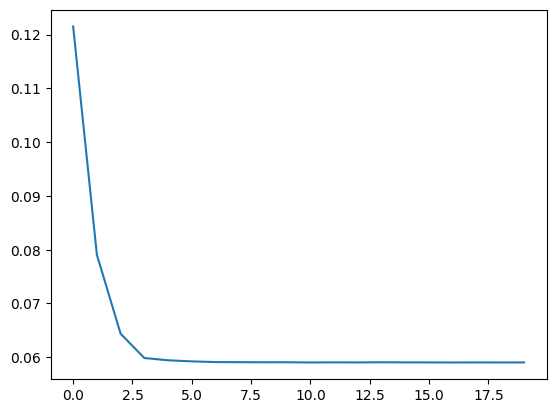

In [231]:
loss_per_epoch = model.history.history['loss']
plt.plot(loss_per_epoch)

In [232]:
trainX.shape

(14540, 14, 14)

In [233]:
# 8-2
prediction_copies = np.repeat(trainY, train_data.shape[1], axis=-1)
y_train=sc.inverse_transform(prediction_copies) #tiến hành xử lí số chuẩn hoá 0-1 thành giá vàng VND
final_model=load_model('save_model.keras') #load lại mô hình tốt nhất đã lưu
y_train_predict=final_model.predict(trainX) #giá dự đoán
y_train_predict = np.repeat(y_train_predict, train_data.shape[1], axis=-1)
y_train_predict=sc.inverse_transform(y_train_predict)

455/455 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step


In [234]:
# 8-2
test=df[len(train_data)-14:].values
test=test.reshape(-1,14)
sc_test=sc.transform(test)

x_test=[]
for i in range(n_past, len(test) - n_future +1):
    x_test.append(sc_test[i - n_past:i, 0:train_data.shape[1]])
x_test=np.array(x_test)

y_test=data[training_data_len:]
y_test_predict=final_model.predict(x_test)
y_test_predict = np.repeat(y_test_predict, train_data.shape[1], axis=-1)
y_test_predict=sc.inverse_transform(y_test_predict)

114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [245]:
train_prediction = []
test_prediction = []
for i in y_train_predict:
    train_prediction.append(i[13])
for i in y_test_predict:
    test_prediction.append(i[13])



In [249]:
train_datal=df[14:training_data_len]
test_datal=df[training_data_len:]

In [250]:
train_datal

,temp,feelslike,dew,humidity,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions_encoded
datetime,,,,,,,,,,,,,,
2022-05-01 14:00:00,29.0,34.5,25.0,79.06,16.6,3.6,178.4,1005.0,88.8,10.0,708,2.5,7,2
2022-05-01 15:00:00,31.0,37.7,25.0,70.47,16.6,5.4,180.0,1004.0,88.8,10.0,578,2.1,6,2
2022-05-01 16:00:00,28.8,32.6,23.2,71.80,42.5,20.9,172.0,1004.1,88.9,10.0,435,1.6,4,2
2022-05-01 17:00:00,28.0,32.7,25.0,83.79,18.0,11.2,170.0,1004.0,88.8,10.0,254,0.9,3,2
2022-05-01 18:00:00,28.0,32.7,25.0,83.79,22.0,7.6,170.0,1005.0,88.8,10.0,67,0.2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-28 05:00:00,25.6,25.6,25.0,96.54,3.6,5.2,36.0,1013.0,50.0,7.0,0,0.0,0,2
2023-12-28 06:00:00,25.0,25.0,25.0,100.00,4.7,4.7,50.0,1013.0,50.0,7.0,0,0.0,0,2
2023-12-28 07:00:00,26.4,26.4,25.3,93.62,4.7,4.9,75.2,1014.0,6.1,9.7,39,0.1,0,0


In [251]:
len(train_prediction)

14540

In [252]:
train_datal['prediction']= train_prediction


/tmp/ipykernel_6509/3135907105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_datal['prediction']= train_prediction


In [254]:
train_datal
train_datal.to_csv('moo.csv', index=False)

ValueError: Length of values (14540) does not match length of index (4201)

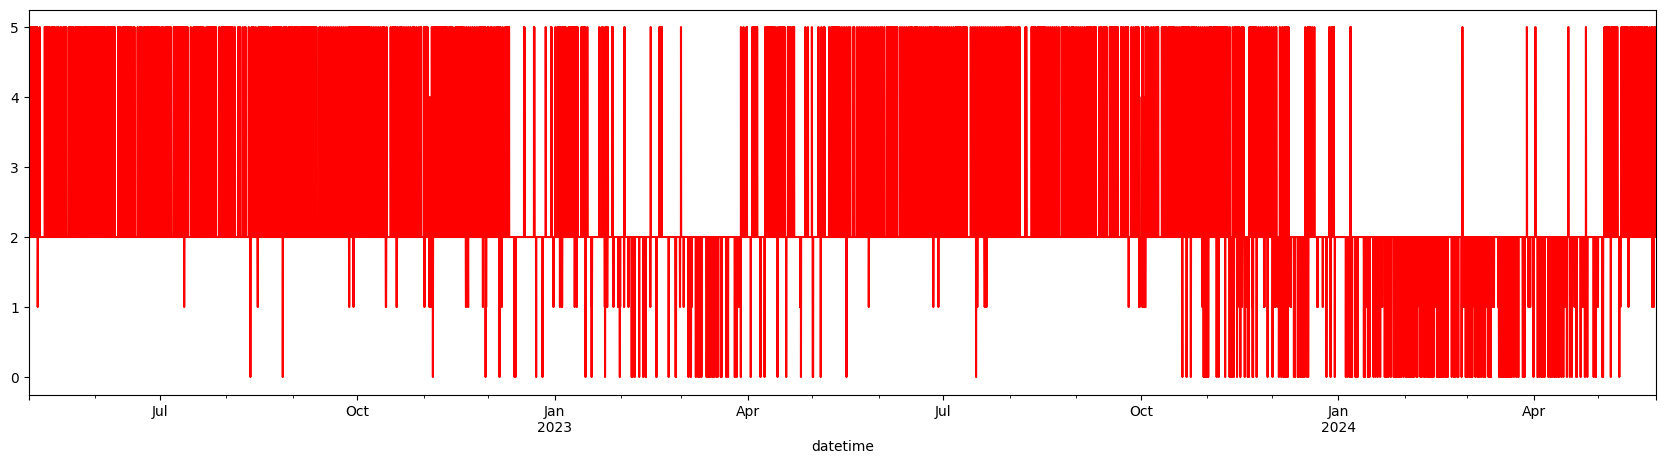

In [239]:
# train_datal=df[30:4231] #vẽ đường predict với dữ liệu train
# test_datal=df[4231:] #vẽ đường  predict với dữ liệu test
format = ticker.StrMethodFormatter('{x:,.0f}')
title = 'Coffee Price'
ylabel = 'Prices (VND)'
xlabel = 'Date'
plt.figure(figsize=(21,5))
plot = df['conditions_encoded'].plot(label=f"Prices Data",color='red')
train_datal['prediction']= train_prediction
plot_pdtrain = train_datal['prediction'].plot(label=f"Prediction train", color='green')
test_datal['prediction']=y_test_predict
plot_pdtest = test_datal['prediction'].plot(label=f"Prediction test", color='blue')

plot.autoscale(axis='x', tight=True)
plot.set(xlabel=xlabel, ylabel=ylabel)
plot.yaxis.set_major_formatter(format)
plt.legend()
plt.grid(True)
plt.show()

In [159]:
train_datal.to_csv('predict.csv', index=False)

In [157]:
#8-2 train data
print('R_square train: ', r2_score(train_datal['conditions_encoded'],train_datal['prediction'])) #R-squared (R2)
print('MAE: ',mean_absolute_error(train_datal['conditions_encoded'],train_datal['prediction'])) #Mean Absolute Error (MAE) đo độ lớn trung bình của các lỗi trong một tập hợp các dự đoán
mape =  mean_absolute_percentage_error(train_datal['conditions_encoded'],train_datal['prediction']) #MAPE (Mean absolute percentage error) là phần trăm sai số trung bình tuyệt đối
print(f"MAPE: {mape * 100:.2f}%")
print('MSE: ',mean_squared_error(train_datal['conditions_encoded'],train_datal['prediction']))
print('RMSE: ',np.sqrt(mean_squared_error(train_datal['conditions_encoded'],train_datal['prediction'])))

R_square train:  -0.21902068072291003
MAE:  0.5887241587104299
MAPE: 10719486304762186.00%
MSE:  0.9583886625749154
RMSE:  0.9789732695916245


In [ ]:
mape_t82 = mean_absolute_percentage_error(test_datal['price_coffee'],test_datal['prediction'])
mape_percentage = mape_t82 * 100
print(f"MAPE: {mape_percentage:.2f}%")
print('RMSE: ',np.sqrt(mean_squared_error(test_datal['price_coffee'],test_datal['prediction'])))

### **PREDICT 30 DAYS**

In [ ]:
sc=MinMaxScaler(feature_range=(0,1))
sc_test=sc.fit_transform(test_data)

In [ ]:
sc_test.shape

In [ ]:
x_input = sc_test[-14:,].reshape(1, -1)

x_input.shape

In [ ]:
x_input

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

print(temp_input)

In [ ]:
len(temp_input)

In [ ]:
lst_output = []
n_steps = 14
i = 0

while i < 30:
    if len(temp_input) > n_steps:
        x_input=np.array(temp_input[0:])
        x_input = x_input.reshape((1, n_steps, 2))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())

        x_input=np.array(temp_input[0:])
        x_input = x_input.reshape((1, n_steps, 2))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        i += 1
    else:
        x_input = np.array(temp_input).reshape((1, n_steps, 2))
        yhat = model.predict(x_input, verbose=0)

        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1



In [ ]:
lst_output

In [ ]:
day_new=np.arange(1,15)
day_pred=np.arange(15,45)

In [ ]:
y_train_predict = np.repeat(lst_output, train_data.shape[1], axis=-1)
y_train_predict_inv=sc.inverse_transform(y_train_predict)

In [ ]:
y_train_predict_inv

In [ ]:
y_train_predict_inv = y_train_predict_inv[:, :-1]
y_train_predict_inv

In [ ]:
test_data = test_data[(len(test_data)-14):]

In [ ]:
test_data

In [ ]:
test_data = test_data[:, :-1]

In [ ]:
pre_predict = test_data[(len(test_data)-14):]

In [ ]:
pre_predict = test_datal[(len(test_datal)-14):]

In [ ]:
pre_predict

In [ ]:
pre_predict.to_csv('pre_predict.csv', index=False)

In [ ]:
pre_predict_df = pd.DataFrame(pre_predict, columns=['price_coffee_pre'])
pre_predict_df

In [ ]:
# test_check.reset_index(inplace=True)
pre_predict_df.to_csv('pre_predict.csv', index=False)

In [ ]:
predict_df = pd.DataFrame(y_train_predict_inv, columns=['price_coffee_pre'])
predict_df

In [ ]:
import pandas as pd

# Get the latest date from the existing DataFrame
latest_date = pre_predict['Date'].max()

# Generate a range of business dates starting from the day after the latest date
dates = pd.date_range(start=latest_date + pd.DateOffset(days=1), periods=len(predict_df), freq='B')

# Assign the dates to the 'Date' column of pre_predict DataFrame
predict_df['Date'] = dates
predict_df = predict_df[['Date', 'price_coffee_pre']]


In [ ]:
predict_df

In [ ]:
predict_df = predict_df[['Date', 'price_coffee_pre']]


In [ ]:
predict_df.to_csv('predict.csv', index=False)

In [ ]:
plt.plot(day_new,test_data[(len(test_data)-14):])
plt.plot(day_pred, y_train_predict_inv)

In [ ]:
df_check = data[training_data_len:]


In [ ]:
df_new=df_check.tolist()
df_new.extend(y_train_predict_inv)
plt.figure(figsize=(14,5))
plt.plot(df_new)

In [ ]:
print("Nhập ngày thứ x ban muốn xem kết quả:")
x=int(input())
print("Bạn nhập ngày thứ:",x)
if x <=0 or x >30:
  print("Không có kết quả")
else:
  result = y_train_predict_inv[x-1]
  print("Kết quả là: ",result)

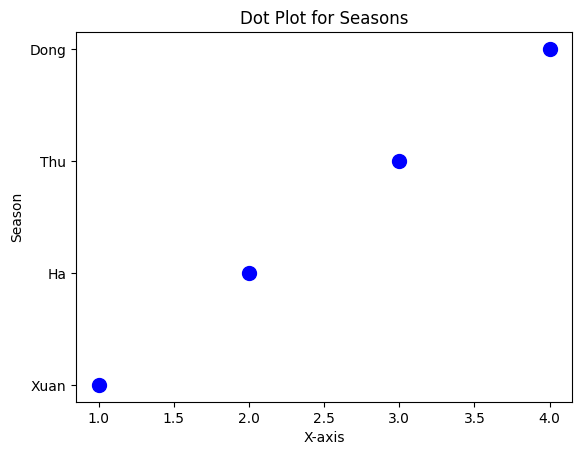

In [1]:
import matplotlib.pyplot as plt

# Data
x = [1, 2, 3, 4]
seasons = ['Xuan', 'Ha', 'Thu', 'Dong']  # Labels for the y-axis

# Plot
plt.plot(x, seasons, 'bo', markersize=10)  # 'bo' for blue dots, markersize sets the size of the dots

# Label axes
plt.xlabel('X-axis')
plt.ylabel('Season')

# Title
plt.title('Dot Plot for Seasons')

# Show plot
plt.show()
